# DATA CLEANING AND EXPLORATORY DATA ANALYSIS ON COVID 19 IN INDIA DATASET

In [213]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [214]:
# Load dataset
file_path = '/Users/mac/Downloads/covid_india.csv'  
df = pd.read_csv(file_path)


In [215]:
# Show first few rows and columns info
print(df.head())
print("\nColumns:", df.columns)

   S. No.        Name of State  Active Cases  Recovered   Deaths  \
0       1  Andaman and Nicobar             4     7408.0    129.0   
1       2       Andhra Pradesh         20593  1944267.0  13490.0   
2       3    Arunachal Pradesh          3032    46399.0    237.0   
3       4                Assam         11719   555470.0   5357.0   
4       5                Bihar           357   715119.0   9646.0   

   Total Confirmed cases  
0                 7541.0  
1              1978350.0  
2                49668.0  
3               572546.0  
4               725122.0  

Columns: Index(['S. No.', 'Name of State', 'Active Cases', 'Recovered', 'Deaths',
       'Total Confirmed cases'],
      dtype='object')


In [216]:
# uncleaned data info
print('uncleaned data info')
df.info()

uncleaned data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   S. No.                 36 non-null     int64  
 1   Name of State          36 non-null     object 
 2   Active Cases           36 non-null     int64  
 3   Recovered              32 non-null     float64
 4   Deaths                 32 non-null     float64
 5   Total Confirmed cases  33 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.8+ KB


# DATA CLEANING

In [217]:
# 1. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 S. No.                   0
Name of State            0
Active Cases             0
Recovered                4
Deaths                   4
Total Confirmed cases    3
dtype: int64


In [218]:
# 2. Strip column names of extra whitespace
df.columns = df.columns.str.strip()

# 3. Rename column "Total Dead cases" to "Deaths"
df.rename(columns={'Total Dead cases': 'Deaths'}, inplace=True)

# 4. Convert numeric columns to proper type (handle non-numeric entries)
numeric_cols = ['Active Cases', 'Recovered', 'Deaths', 'Total Confirmed cases']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Fill missing numeric values with median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# 6. Convert 'Name of State' to a category type
df['Name of State'] = df['Name of State'].astype('category')

In [226]:
# 7. Add calculated columns
df['Death Rate %'] = (df['Deaths'] / df['Total Confirmed cases']) * 100
df['Recovery Rate %'] = (df['Recovered'] / df['Total Confirmed cases']) * 100
print(df.columns.tolist())

['S. No.', 'Name of State', 'Active Cases', 'Recovered', 'Deaths', 'Total Confirmed cases', 'Death Rate %', 'Recovery Rate %']


Cleaned Data Info

In [227]:
# 8. Final structure of cleaned data
print("\nCleaned Data Info:")
df.info()


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   S. No.                 36 non-null     int64   
 1   Name of State          36 non-null     category
 2   Active Cases           36 non-null     int64   
 3   Recovered              36 non-null     float64 
 4   Deaths                 36 non-null     float64 
 5   Total Confirmed cases  36 non-null     float64 
 6   Death Rate %           36 non-null     float64 
 7   Recovery Rate %        36 non-null     float64 
dtypes: category(1), float64(5), int64(2)
memory usage: 3.5 KB


# EXPLORATORYY DATA ANALYSIS

In [228]:
# Exploratory data analysis(EDA)
# Summary Statistics
print(df.describe(include='all'))

           S. No.        Name of State   Active Cases     Recovered  \
count   36.000000                   36      36.000000  3.600000e+01   
unique        NaN                   36            NaN           NaN   
top           NaN  Andaman and Nicobar            NaN           NaN   
freq          NaN                    1            NaN           NaN   
mean    18.500000                  NaN   11448.694444  8.364733e+05   
std     10.535654                  NaN   31839.162320  1.223935e+06   
min      1.000000                  NaN       4.000000  7.408000e+03   
25%      9.750000                  NaN     326.000000  8.883725e+04   
50%     18.500000                  NaN    1387.000000  4.487250e+05   
75%     27.250000                  NaN    9166.000000  8.471915e+05   
max     36.000000                  NaN  178722.000000  6.130137e+06   

               Deaths  Total Confirmed cases  Death Rate %  Recovery Rate %  
count       36.000000           3.600000e+01     36.000000        36.

In [229]:
# Total death cases overall and death %
total_deaths = df['Deaths'].sum()
print(f"\nTotal Death Cases Overall in India: {total_deaths}")
# Total recovery and survival cases overall and  death%
total_recovered = df['Recovered'].sum()
print(f"\nTotal survival Cases Overall in India: {total_recovered}")


Total Death Cases Overall in India: 449611.0

Total survival Cases Overall in India: 30113039.0


# EDA Visualizations

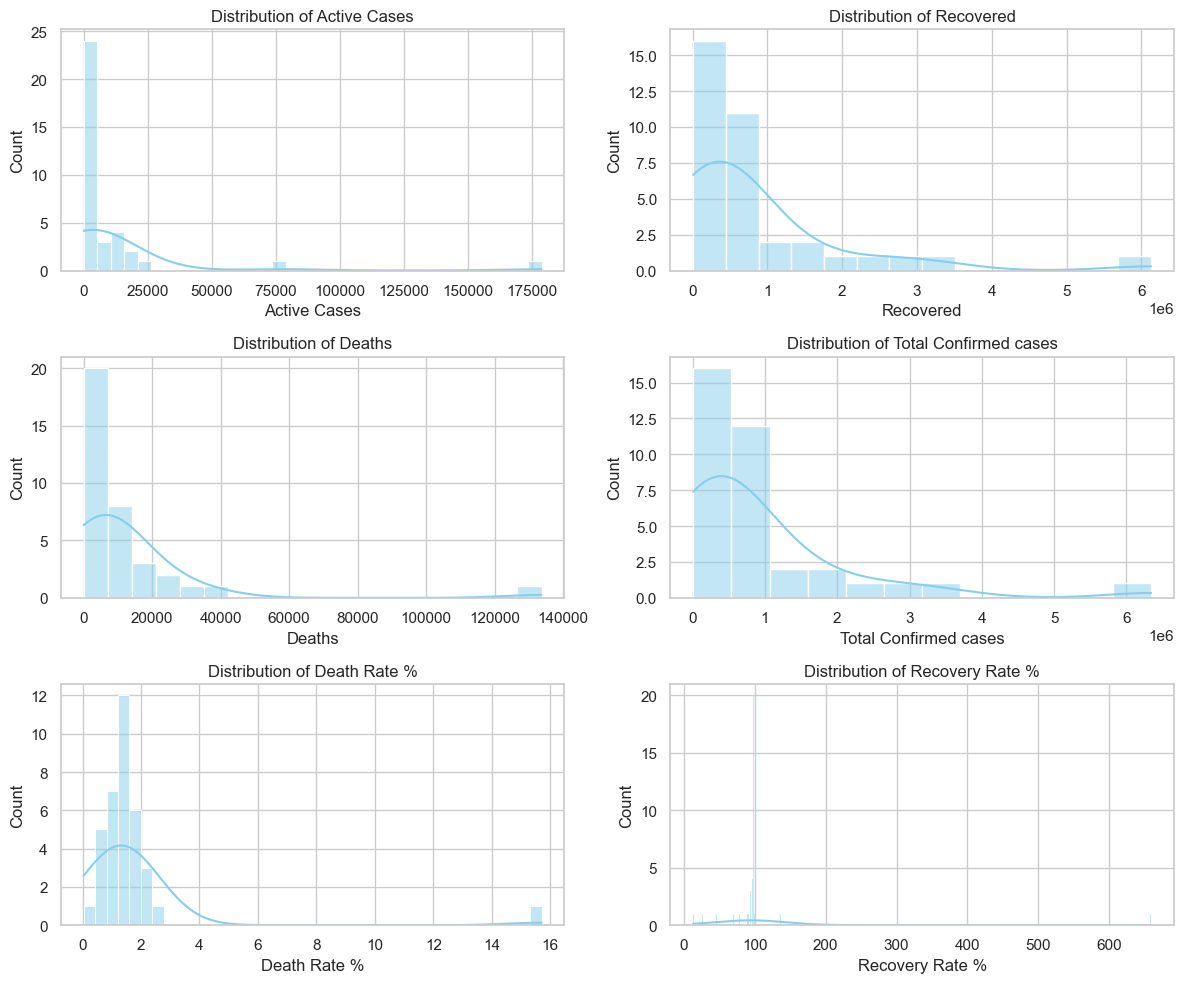

In [230]:
#  Distribution of Numeric Variables 
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols + ['Death Rate %', 'Recovery Rate %']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


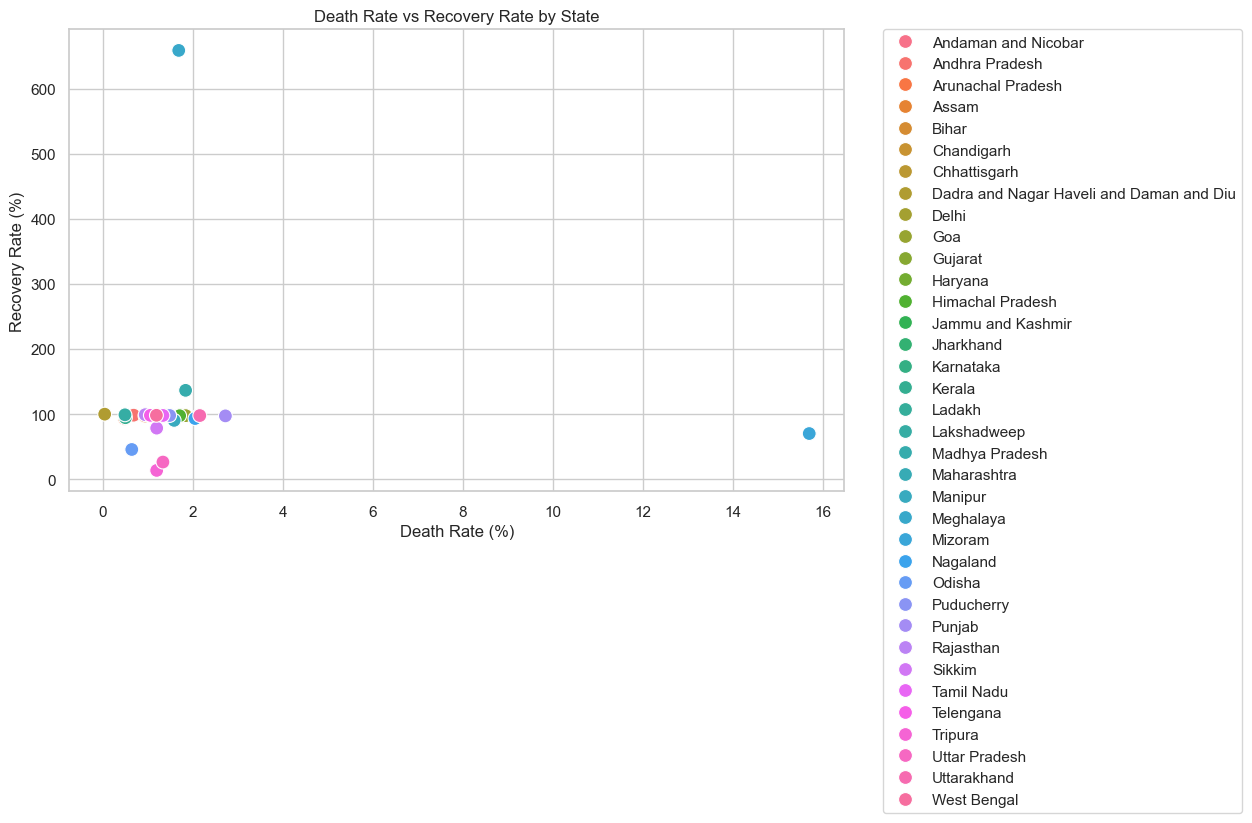

In [224]:
# Plot death rate vs recovery rate scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Death Rate %', y='Recovery Rate %', hue='Name of State', s=100)
plt.title('Death Rate vs Recovery Rate by State')
plt.xlabel('Death Rate (%)')
plt.ylabel('Recovery Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

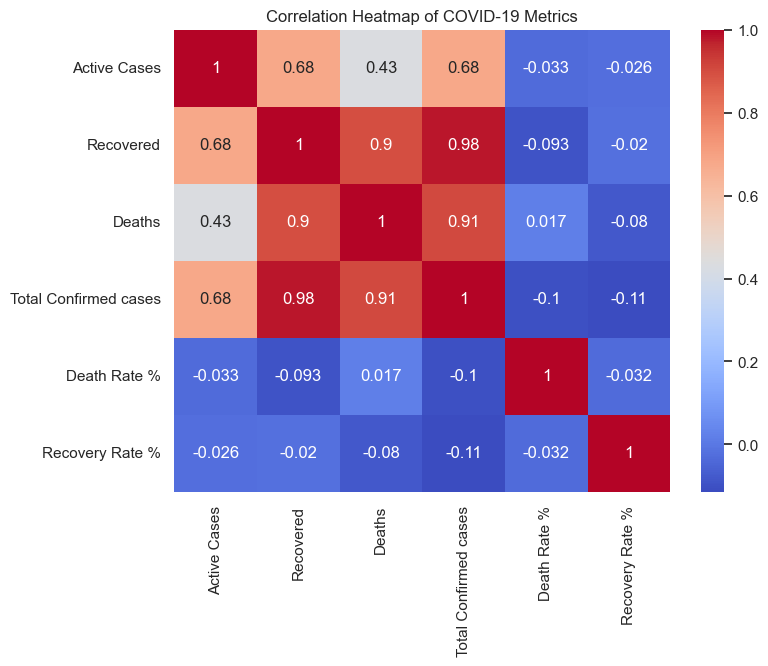

In [225]:
# Correlation heatmap of COVID-19 metrics
plt.figure(figsize=(8,6))
covid_metrics = ['Active Cases', 'Recovered', 'Deaths', 'Total Confirmed cases', 'Death Rate %', 'Recovery Rate %']
sns.heatmap(df[covid_metrics].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.show()